In [1]:
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares
import re
%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}
base_colors = {"sdssg":"green", "sdssi":"blue", "sdssr":"red", "sdssz":"magenta"}

import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools

import sncosmo

In [2]:
def show_multi_filter_light_curve(t, colors, n_factor = None, conv='.'):
   
    t_by_filter = t.group_by("bandpass")

    indices = t_by_filter.groups.indices
    
    #print indices
    for i in range(0, len(indices)-1):
        
        data = t_by_filter[indices[i]:indices[i+1]]
        
        if n_factor is not None:
            value = n_factor[data[0]["bandpass"]]
            f = value if np.isnan(value) == False else 1
            plt.errorbar(data["mjd"], data["flux"]*f,yerr=data["flux_error"]*f, fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])            
        else:
            plt.errorbar(data["mjd"], data["flux"],yerr=data["flux_error"], fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])
    plt.legend()
    #plt.show()
    
def match_with_lc(snls_array, stack_lc):
    matches = []
    for lc in snls_array:
        #print "light curve"
        val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
        #print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
        for i, slc in enumerate(stack_lc):

            comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
            if DSTools.source_distance(val, comp)<1:
                print i
                matches.append((lc,slc))


    print len(matches)
    return matches


In [3]:
lienObj = glob.glob("/datadec/cppm/jpreyes/CFHT_Production/light_curves_candidates/*.dat")

In [4]:
def f(obj):
    table = ascii.read(obj)
    return table

In [5]:
import multiprocessing
try:
    pool = multiprocessing.Pool()
    res =  pool.map(f, lienObj)
finally:
    pool.close()

In [6]:
print len(res)

49311


In [7]:
lcs = res

In [8]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
#elems = re.findall('^(.*?D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
elems = re.findall('^(04D3.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
f.close()

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()
f.close()


In [9]:
snls_array = []
for sn in elems:

        c = coord.SkyCoord(sn[1], unit=(u.hourangle, u.deg))
        
        m = re.findall('^'+str(sn[0])+'\\|(r|g|z|i)\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)
        
        snls_lc = DSTools.build_light_curve_from_snls_file_2(m, c, sn[0], sn[-1])

        if len(m)>0:
            #print sn[0], c.ra.deg, c.dec.deg

            #plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
            #show_multi_filter_light_curve(snls_lc, snls_colors)
            plt.show()
            snls_array.append(snls_lc)

print("total of sn:" + str(len(snls_array)))

total of sn:25


In [43]:
snls_array[4]

mjd,dec,zpsys,flux,ra,flux_error,z,zp,id,bandpass
float64,float64,str2,float64,float64,float64,str6,float64,str6,str5
53080.59,0.915786087975,ab,7.5587,3.74288803333,21.405,1.0020,25.0,04D3dd,sdssi
53081.6,0.915786087975,ab,-6.6712,3.74288803333,15.327,1.0020,25.0,04D3dd,sdssr
53083.53,0.915786087975,ab,32.866,3.74288803333,24.006,1.0020,25.0,04D3dd,sdssi
53083.58,0.915786087975,ab,19.08,3.74288803333,14.303,1.0020,25.0,04D3dd,sdssr
53083.6,0.915786087975,ab,2.0901,3.74288803333,8.1307,1.0020,25.0,04D3dd,sdssg
53083.63,0.915786087975,ab,-61.291,3.74288803333,117.61,1.0020,25.0,04D3dd,sdssz
53094.55,0.915786087975,ab,137.85,3.74288803333,18.705,1.0020,25.0,04D3dd,sdssi
53094.59,0.915786087975,ab,46.275,3.74288803333,15.922,1.0020,25.0,04D3dd,sdssr
53094.61,0.915786087975,ab,235.33,3.74288803333,87.035,1.0020,25.0,04D3dd,sdssz


In [94]:
def filter_curves(lc):
    t_by_filter = lc.group_by("bandpass")
    indices = t_by_filter.groups.indices
    if len(indices)>=3:
        return lc

try:
    pool = multiprocessing.Pool()
    s_candidates =  pool.map(filter_curves, lcs)
finally:
    pool.close()

In [109]:
c = lcs[0]["bandpass"]
"sdssr" in c.data

True

In [113]:
result = filter(lambda x: "sdssi" in x["bandpass"], lcs)

In [114]:
len(result)

0

In [95]:
print s_candidates[0]

None


In [91]:
A = [1,2,3,4,5,6,7,8,9]
B = filter(lambda x: x>5, A)
print B

[6, 7, 8, 9]


In [10]:
s_candidates = res

In [11]:
for candidate in s_candidates:
    for i, (ra, dec) in enumerate(zip(candidate["ra"], candidate["dec"])):
        try:
            candidate["ra"][i] = float(ra.split()[0])
            candidate["dec"][i] = float(dec.split()[0])
        except Exception as e:
            print e
            continue
    candidate["ra"] = candidate["ra"].astype("float")
    candidate["dec"] = candidate["dec"].astype("float")
    
    
    
    

In [23]:
matches_sc = match_with_lc(snls_array, s_candidates)

15270
28396
33663
48772
39553
29782
42888
25662
28415
37482
35280
2206
47550
14135
45853
24432
11411
33204
38965
40594
2749
17303
27272
31334
24


In [26]:
m

(<Table length=113>
   mjd    zpsys   flux         ra      flux_error      dec          zp   bandpass
 float64   str2 float64     float64     float64      float64     float64   str5  
 -------- ----- -------- ------------- ---------- -------------- ------- --------
 53146.43    ab   -41.09 3.75095865396     27.804 0.917237668618    25.0    sdssi
 53146.46    ab   1.9028 3.75095865396     12.972 0.917237668618    25.0    sdssr
 53146.49    ab   -2.918 3.75095865396     6.5113 0.917237668618    25.0    sdssg
 53149.27    ab    17.38 3.75095865396     14.305 0.917237668618    25.0    sdssi
 53149.31    ab   1.1788 3.75095865396     12.916 0.917237668618    25.0    sdssr
 53149.33    ab   12.528 3.75095865396     5.0137 0.917237668618    25.0    sdssg
 53151.33    ab  -2.9292 3.75095865396     59.209 0.917237668618    25.0    sdssz
 53151.38    ab   3.8343 3.75095865396     35.857 0.917237668618    25.0    sdssi
 53151.45    ab  -11.637 3.75095865396     17.071 0.917237668618    25.0    sd

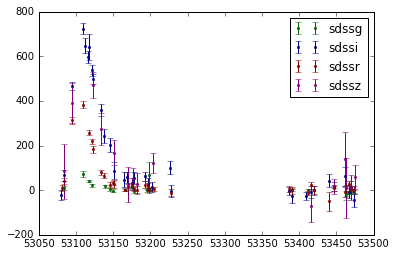

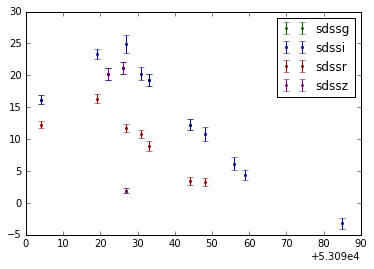

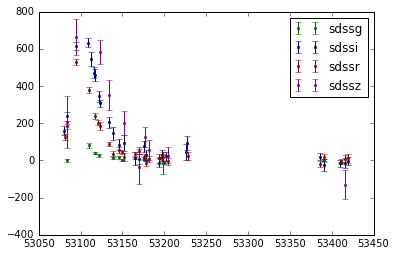

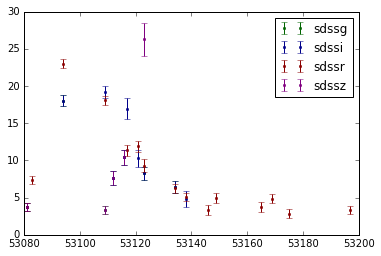

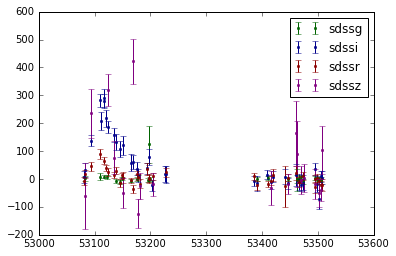

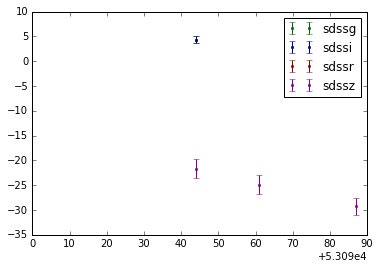

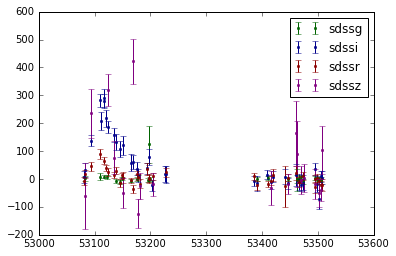

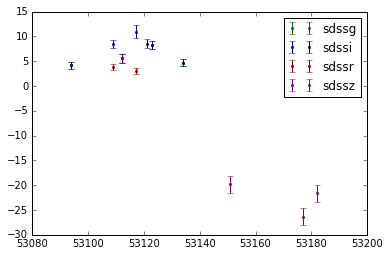

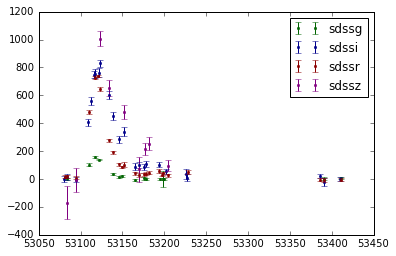

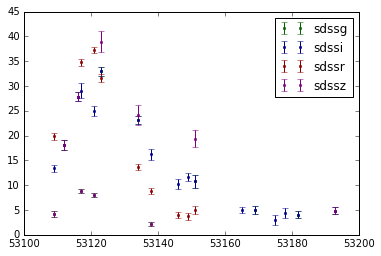

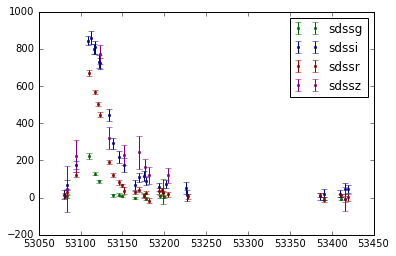

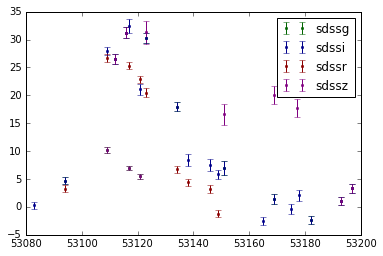

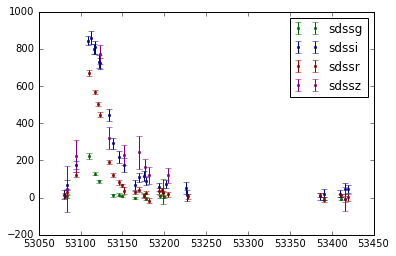

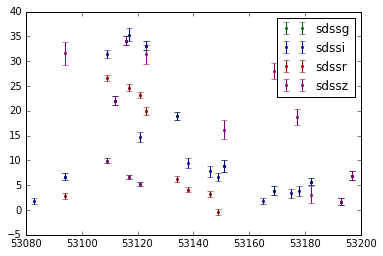

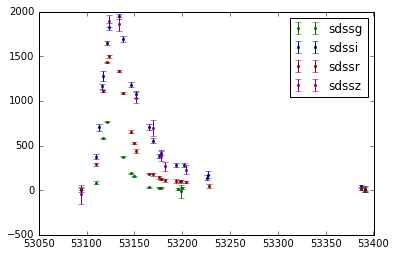

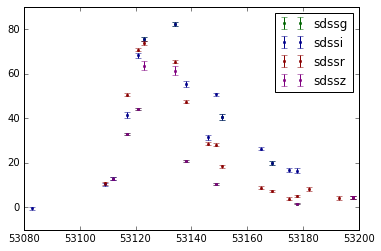

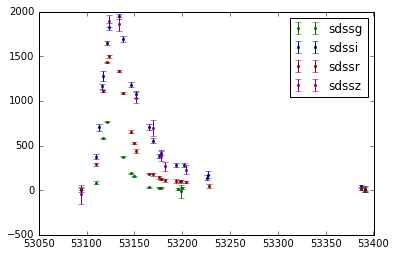

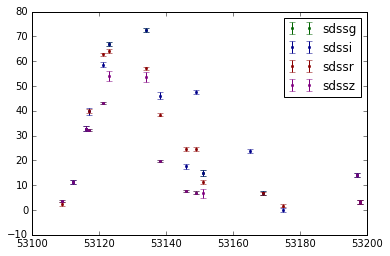

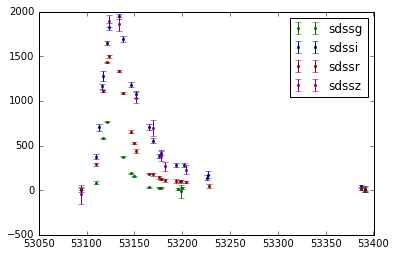

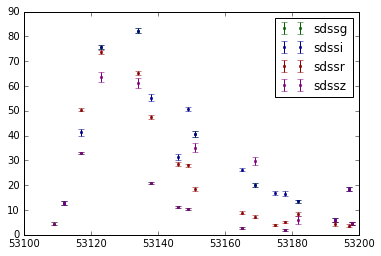

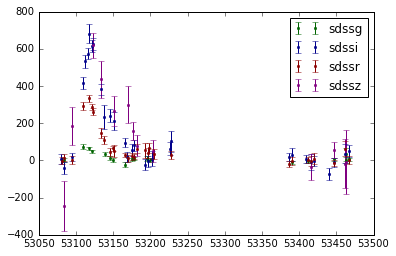

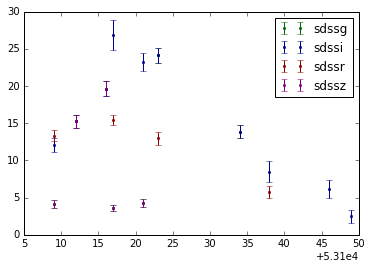

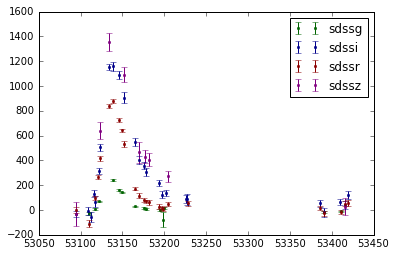

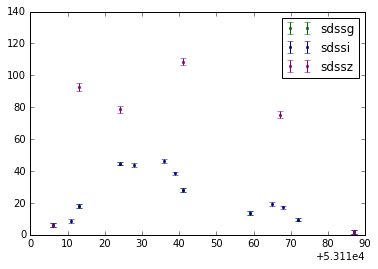

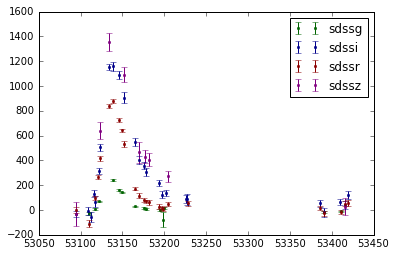

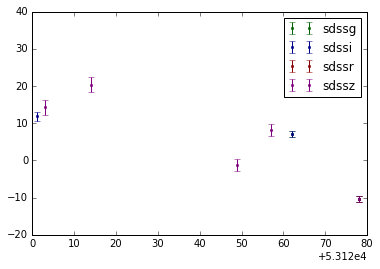

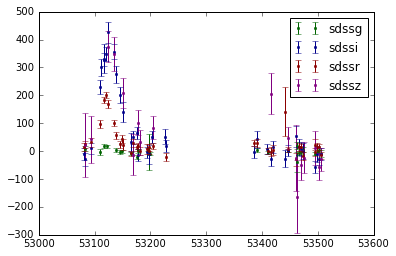

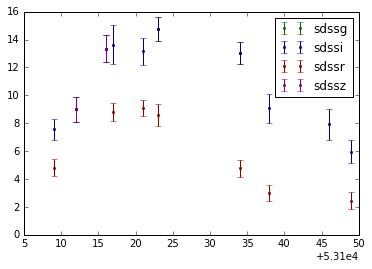

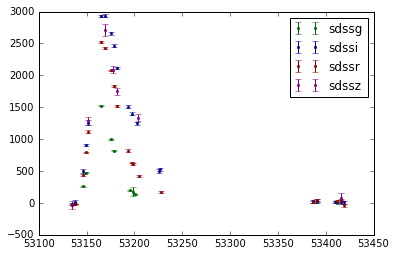

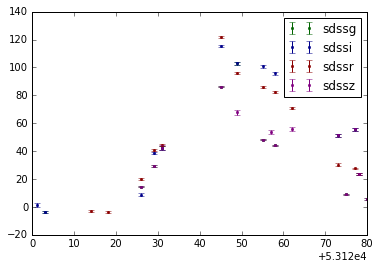

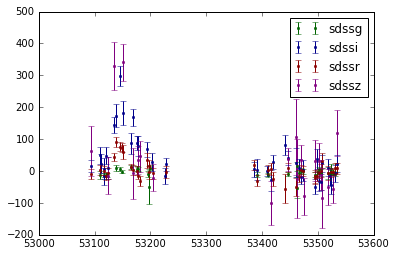

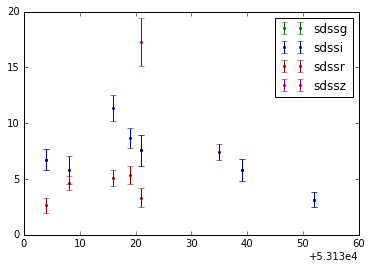

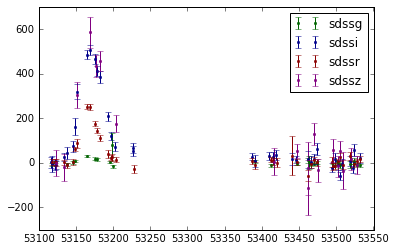

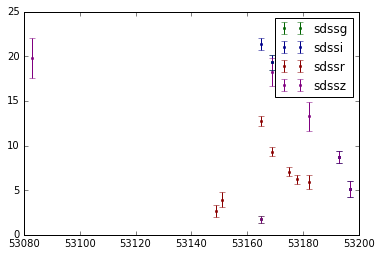

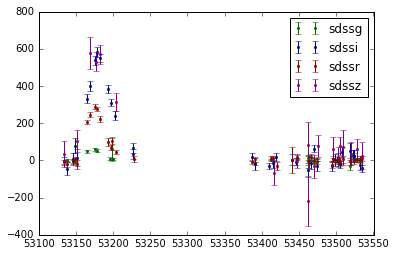

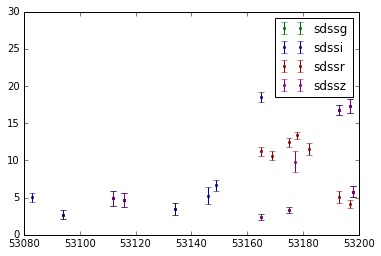

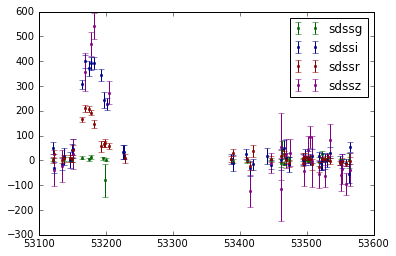

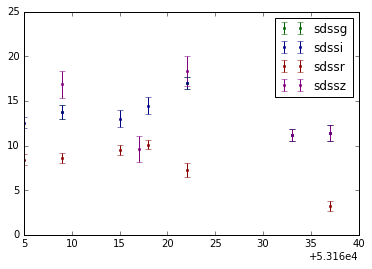

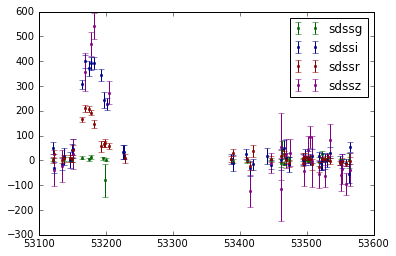

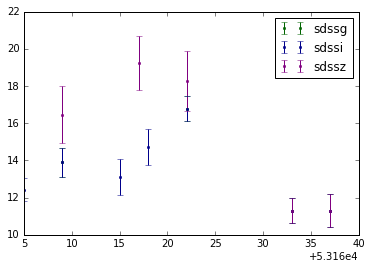

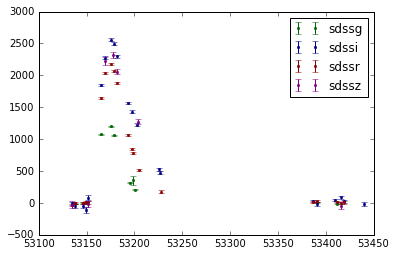

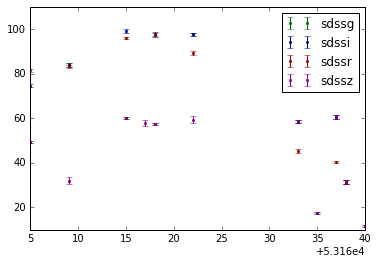

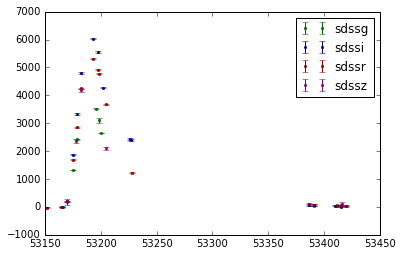

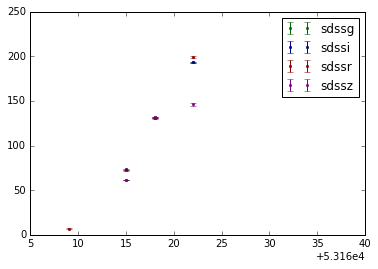

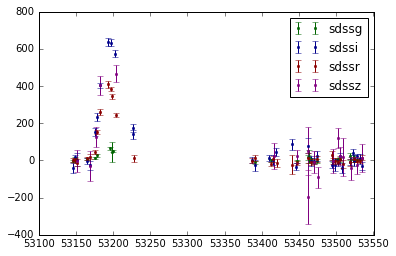

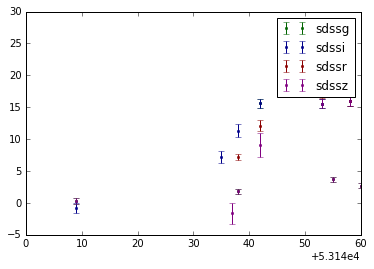

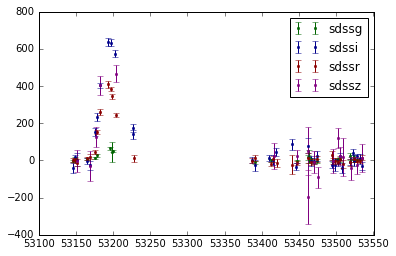

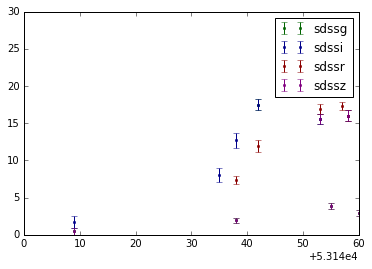

In [25]:
for m in matches_sc:
    show_multi_filter_light_curve(m[0], snls_colors)
    plt.show()
    show_multi_filter_light_curve(m[1], snls_colors)
    plt.show()
    print("====================")
    

In [22]:
matches_sc

mjd,zpsys,flux,ra,flux_error,dec,zp,bandpass
float64,str2,float64,float64,float64,float64,float64,str5
53146.43,ab,-41.09,3.75095865396,27.804,0.917237668618,25.0,sdssi
53146.46,ab,1.9028,3.75095865396,12.972,0.917237668618,25.0,sdssr
53146.49,ab,-2.918,3.75095865396,6.5113,0.917237668618,25.0,sdssg
53149.27,ab,17.38,3.75095865396,14.305,0.917237668618,25.0,sdssi
53149.31,ab,1.1788,3.75095865396,12.916,0.917237668618,25.0,sdssr
53149.33,ab,12.528,3.75095865396,5.0137,0.917237668618,25.0,sdssg
53151.33,ab,-2.9292,3.75095865396,59.209,0.917237668618,25.0,sdssz
53151.38,ab,3.8343,3.75095865396,35.857,0.917237668618,25.0,sdssi
53151.45,ab,-11.637,3.75095865396,17.071,0.917237668618,25.0,sdssr
